In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

# Load the CSV file
# file_path = r"20250704_bands_ff_23p3_eps_10p89.csv"  
# file_path = r"20250707_bands_ff_20_eps_10p89.csv" #this one is complete
# file_path = r"20250707_bands_ff_20p45_eps_10p89.csv"  
# file_path = r"20250714_bands_ff_20p48_eps_10p89_gamma_periodicity_11.4301.csv"
# file_path = r"20250715_bands_ff_20p49_eps_10p89_gamma_periodicity_11.39.csv"
# file_path=r"20250715_bands_ff_20p49_eps_10p89_gamma_cylinders.csv"
# file_path="20250715_bands_ff_20p53_eps_13_cylinders_res_150.csv"
# file_path="20250715_bands_ff_20p52_eps_13_cylinders_res_170.csv"
# file_path = r"H:\phd stuff\tidy3d\Notebooks\LSU Project\20250630 MPB Bands analysis\20250813_woodpile\woodpile_phi0p2272.csv"
file_path = "./20250922_one_v1/one_v1.csv"

In [2]:
freqs = []
k_points = []
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        freqs.append(row[5:])
        k_points.append(row[0])


In [3]:
freqs = np.array(freqs[1:],dtype=float)
k_points= np.array(k_points[1:],dtype=float)
print(k_points.shape,freqs.shape)

(45,) (45, 8)


In [4]:
def get_gaps(list_freqs):
    flattened_lambdas = np.sort(np.concatenate(list_freqs))
    bands = []
    gaps_list = np.diff(flattened_lambdas)
    for i,gaps in enumerate(gaps_list):
        if gaps>0.05:
            # max_gap_index = np.argmax(gaps)
            bandgap_lower = flattened_lambdas[i]
            bandgap_upper = flattened_lambdas[i + 1]
            gap_width = (bandgap_upper-bandgap_lower)/((bandgap_upper+bandgap_lower)/2)
            bands.append([bandgap_lower,bandgap_upper,gap_width])
    return bands

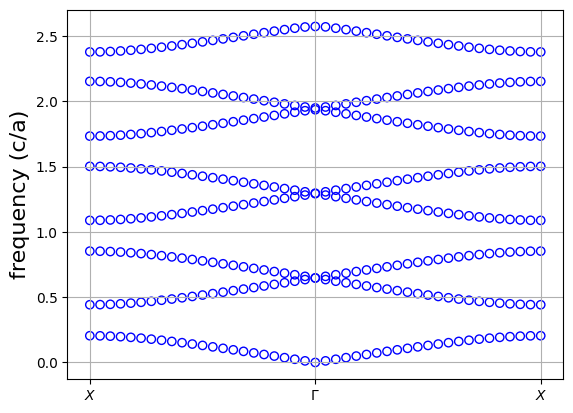

In [12]:
for item in freqs.T:
    plt.scatter(k_points-1,(item), color="blue",facecolors='none')

# plt.plot(k_points,freqs, color='blue',linewidth=0.1)
# tick_labs = [r'$\Gamma$', r'$X$', r'$M$', r'$R$',r'$\Gamma$', r'$M$',r'$X$',r'$R$']
tick_labs = [r'$X$',r'$\Gamma$',r'$X$']

plt.ylabel('frequency (c/a)', size=16)
points_in_between = 21
tick_locs = [i*points_in_between+i for i in range(len(tick_labs))]

# gap = get_gaps(freqs[freqs>1.5][np.newaxis,:])
# for item in gap:
#     plt.fill_between(k_points-1,item[0],item[1], color='red', alpha=0.2)
#     plt.text(k_points[int(len(k_points)/4)],((item[0]+item[1])/2), rf'$\Delta \omega / \omega_0 = {item[2]*100 :.2f}$%', fontsize = 12)

# plt.fill_between(k_points-1,gap[0],gap[1], color='red', alpha=0.2)
# plt.text(k_points[int(len(k_points)/4)],((gap[0]+gap[1])/2), rf'$\Delta \omega / \omega_0 = {gap[2]*100 :.2f}$%', fontsize = 12)
plt.grid(True)
plt.xticks(tick_locs, tick_labs)
plt.show()

In [6]:
# (0.8/(((gap[0]+gap[1])/2)/(11.43)))

In [7]:
# units_conversion = 0.8*11.43
# for item in freqs.T:
#     plt.scatter(k_points-1,units_conversion*(1/item), color="blue",facecolors='none')

# # plt.plot(k_points,freqs, color='blue',linewidth=0.1)
# tick_labs = [r'$\Gamma$', r'$X$', r'$M$', r'$R$',r'$\Gamma$', r'$M$',r'$X$',r'$R$']
# plt.ylabel(r'$\lambda (\mu m)$', size=16)
# points_in_between = 4
# tick_locs = [i*points_in_between+i for i in range(len(tick_labs))]
# plt.grid(True)
# plt.xticks(tick_locs, tick_labs)
# plt.fill_between(k_points-1,units_conversion/gap[0],units_conversion/gap[1], color='red', alpha=0.2)
# plt.text(k_points[int(len(k_points)/4)],((units_conversion/gap[0]+units_conversion/gap[1])/2), rf'$\Delta \omega / \omega_0 = {gap[2]*100 :.2f}$%', fontsize = 12)
# plt.ylim(4.3,5.5)
# plt.show()